メモ

[ベイズ実験計画法](https://www.doe-get-started.com/entry/Bayesian-Optimization)

処置のコンテクスト依存性とは？

① 「これまでの処置」が因果効果に影響する（動的処置の履歴）

 ② サンプルの選び方による「交絡（confounding）」

 ③ 一般化可能性（外的妥当性）の問題

 ---
Q

IPWの極端な重みづけへの対応、基準


ノンパラメトリックな操作変数法とは？

自然言語処理に対する因果推論（傾向スコアのようなスコア化？）


## 構造方程式モデル（SEM）

In [ ]:
!pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 5.1 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=cb1c0a1e95c4a1715c0b3a664e4a8d54d3aee57f70217907badb86ce735f68f5
  Stored in directory: /root/.cache/pip/wheels/d2/9a/31/fae291ff6a649bad125037eef8c7cc63d8c542e14bdcccea37
Successfully built semopy


In [ ]:
import numpy as np
import pandas as pd
import semopy as sem

# 1. 合成データの生成
# 乱数のシードを設定（再現性のため）
np.random.seed(0)

# サンプルサイズ
N = 200

# TVCM（テレビCMの視聴者関心度［独自指標］）のデータを生成
TV_CM = np.random.normal(50, 10, N)

# 気温（Temperature_C、摂氏）のデータを生成。範囲は10~35℃。
Temperature_C = np.random.uniform(10, 35, N)

# ノイズ（Noise）のデータを生成
Noise = np.random.normal(0, 5, N)

# 炭酸飲料の売上（Soda_Sales）を生成。TV_CMとTemperature_Cの影響を強くする。
Soda_Sales = 10 + 0.5 * TV_CM + 2.0 * Temperature_C + Noise

# データフレームを作成
data = pd.DataFrame({
    'TV_CM': TV_CM,
    'Temperature_C': Temperature_C,
    'Soda_Sales': Soda_Sales
})

DAG<br>
結果：売上 , 処置:TVCM , 共変量:気温

また、この時識別仮定は満たしているものとする（観測データから正しい因果効果を導き出すための前提条件）

In [ ]:
# SEMモデルの定義
model_desc = """
# 回帰分析
Soda_Sales ~ TV_CM + Temperature_C
"""

In [ ]:
mod = sem.Model(model_desc)
res = mod.fit(data)
print(res)

#最小化する目的関数： MLW(共分散行列の最尤推定)
#最適化メソッド：SLSQP(逐次最小二乗計画法)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.000
Number of iterations: 12
Params: 0.513 2.043 26.145


In [ ]:
#精度検証
stats = sem.calc_stats(mod)
print(stats.T)

#全体評価
#GFI 0.9以上,RMSEA 0.05以下 で当てはまりがよいとされる

                      Value
DoF            3.000000e+00
DoF Baseline   5.000000e+00
chi2           1.050434e-04
chi2 p-value   9.999997e-01
chi2 Baseline  4.891441e+02
CFI            1.006196e+00
GFI            9.999998e-01
AGFI           9.999996e-01
NFI            9.999998e-01
TLI            1.010327e+00
RMSEA          0.000000e+00
AIC            5.999999e+00
BIC            1.589495e+01
LogLik         5.252169e-07


In [ ]:
# モデルパラメータの確認
ins = mod.inspect()
print(ins)

#部分的評価
#p-値(0に近いとよい)、係数などから判断

         lval  op           rval   Estimate  Std. Err    z-value  p-value
0  Soda_Sales   ~          TV_CM   0.513118  0.035408  14.491412      0.0
1  Soda_Sales   ~  Temperature_C   2.043452  0.047345  43.160776      0.0
2  Soda_Sales  ~~     Soda_Sales  26.145319  2.614532  10.000000      0.0


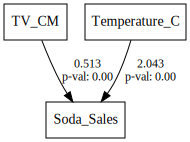

In [ ]:
# SEMの可視化
sem.semplot(mod, "business_case_SEM.png")

# 視聴者の関心度1単位増加→売り上げ0.513[百万円]増加
# 気温1℃増加→売り上げ2.043[百万円]増加

線形回帰に基づくSEMの課題
*   非線形・多重共線性
*   共変量が多い時の正値性（スカラーが正）の確認が難しい
*   未観測の交絡因子が存在するとき（例：屋外イベントなど）



## SEM 補足例

参考；https://qiita.com/h-fkn/items/4a44559748e0ef4a2c4a

In [ ]:
!pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 4.7 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=f23f151e04db76729db3721df60b84fc7d1d35a004456e604d204e2518a62d71
  Stored in directory: /root/.cache/pip/wheels/d2/9a/31/fae291ff6a649bad125037eef8c7cc63d8c542e14bdcccea37
Successfully built semopy


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import semopy
from semopy import Model

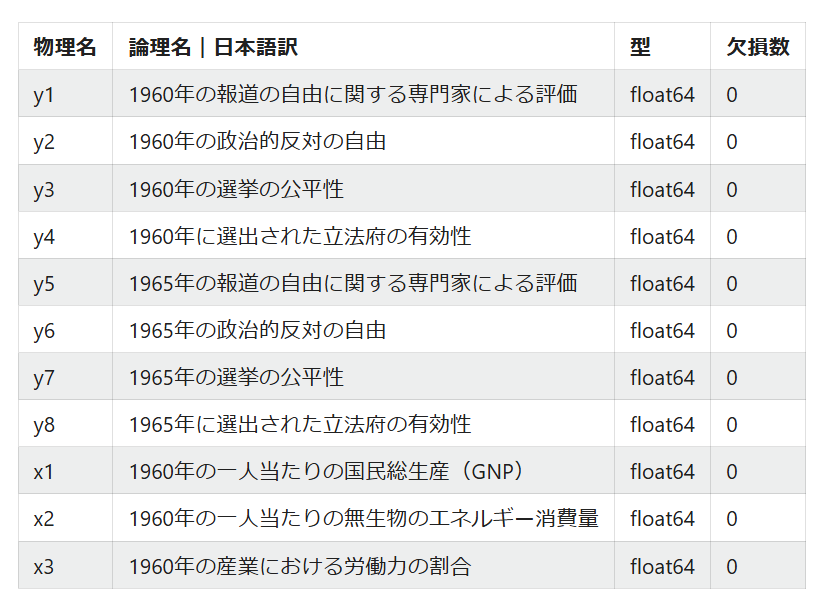

データ内容：政治的民主性と経済発展に関する観測変数（複数の国の複数指標）

測定対象：民主性・経済発展の指標をもとに、潜在変数「政治的民主性（Dem）」と「工業化（Ind）」を構成

データには複数時点の指標が含まれており、時間をまたぐ因果推定も可能

| 種別      | 変数名                  | 説明                        |
| ------- | -------------------- | ------------------------- |
| 処置変数    | `ind60`              | 工業化（1960年）                |
| 結果変数    | `dem65`              | 政治的民主性（1965年）             |
| 共変量（交絡） | `dem60`              | 政治的民主性（1960年） → 結果に影響を与える |
| 測定変数    | `x1`〜`x3`, `y1`〜`y8` | 潜在変数を観測レベルで構成する指標群        |


In [ ]:
data = semopy.examples.political_democracy.get_data()
print(data.head())

      y1        y2        y3        y4        y5        y6        y7  \
1   2.50  0.000000  3.333333  0.000000  1.250000  0.000000  3.726360   
2   1.25  0.000000  3.333333  0.000000  6.250000  1.100000  6.666666   
3   7.50  8.800000  9.999998  9.199991  8.750000  8.094061  9.999998   
4   8.90  8.800000  9.999998  9.199991  8.907948  8.127979  9.999998   
5  10.00  3.333333  9.999998  6.666666  7.500000  3.333333  9.999998   

         y8        x1        x2        x3  
1  3.333333  4.442651  3.637586  2.557615  
2  0.736999  5.384495  5.062595  3.568079  
3  8.211809  5.961005  6.255750  5.224433  
4  4.615086  6.285998  7.567863  6.267495  
5  6.666666  5.863631  6.818924  4.573679  


measurment model(潜在変数の構成)：潜在変数（ind60, dem60, dem65）は、複数の観測指標（x1〜y8）から構成される

DAG解釈：観測変数 → 潜在変数の因果関係

regressions（潜在変数間の因果関係）：工業化（ind60）は1960年の民主性（dem60）に影響を与える

さらに、ind60 と dem60 は5年後の民主性（dem65）にも影響を与える

residual correlation(誤差の相関)：観測変数間で、モデルに含まれていない共通要因（例：調査方法、文化的共通性など）がある可能性を考慮して、誤差項同士の相関をモデル化




In [ ]:
#仮説モデル
desc = semopy.examples.political_democracy.get_model()
print(desc)

# measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60
# residual correlations
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8


③ 識別仮定の確認（識別性 & SUTVA）

識別性：複数の観測変数によって潜在変数が構成され、構造も単純すぎず識別可能

モデル内で交絡因子が統計的に制御されているとみなせる構造

SUTVA：

各国が互いに影響しないと仮定（例：y1 の国の状況が y5 の国に影響しない）



In [ ]:
model = Model(desc)
result = model.fit(data)
print(result)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.508
Number of iterations: 52
Params: 2.180 1.819 1.257 1.058 1.265 1.186 1.280 1.266 1.482 0.572 0.838 0.624 1.893 1.320 2.156 7.385 0.793 5.067 0.347 3.148 1.357 4.954 3.951 0.172 0.448 0.082 0.120 0.467 2.352 3.430 3.256


In [ ]:
inspect = model.inspect()
print(inspect)

     lval  op   rval  Estimate  Std. Err    z-value   p-value
0   dem60   ~  ind60  1.482379  0.399024   3.715017  0.000203
1   dem65   ~  ind60  0.571912  0.221383   2.583364  0.009784
2   dem65   ~  dem60  0.837574  0.098446   8.507992       0.0
3      x1   ~  ind60  1.000000         -          -         -
4      x2   ~  ind60  2.180494  0.138565  15.736254       0.0
5      x3   ~  ind60  1.818546  0.151993   11.96465       0.0
6      y1   ~  dem60  1.000000         -          -         -
7      y2   ~  dem60  1.256819  0.182687   6.879647       0.0
8      y3   ~  dem60  1.058174  0.151521   6.983699       0.0
9      y4   ~  dem60  1.265186  0.145151   8.716344       0.0
10     y5   ~  dem65  1.000000         -          -         -
11     y6   ~  dem65  1.185743  0.168908   7.020032       0.0
12     y7   ~  dem65  1.279717  0.159996    7.99841       0.0
13     y8   ~  dem65  1.266084  0.158238   8.001141       0.0
14  dem60  ~~  dem60  3.950849  0.920451   4.292296  0.000018
15  dem6

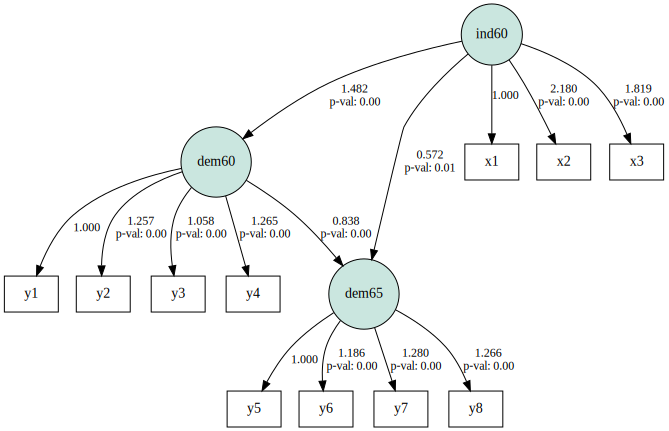

In [ ]:
semopy.semplot(model, "graph.png")

*  工業化（ind60）は、1960年時点の民主性（dem60）を高めることで、将来（1965年）の民主性（dem65）を大きく押し上げている。

*  直接的な制度導入以上に、過去の民主的基盤の育成が将来に持続的な影響を与える。

*  間接効果が支配的であることから、短期的な施策だけでなく、中長期的な制度・社会基盤の形成が重要であることを示唆。

In [ ]:
stats = semopy.calc_stats(model)
print(stats.T)

#全体評価
#GFI 0.9以上,RMSEA 0.05以下 で当てはまりがよいとされる

#GFI=0.947820
#RMSEA=0.034738

                    Value
DoF             35.000000
DoF Baseline    55.000000
chi2            38.125446
chi2 p-value     0.329171
chi2 Baseline  730.654577
CFI              0.995374
GFI              0.947820
AGFI             0.918003
NFI              0.947820
TLI              0.992731
RMSEA            0.034738
AIC             60.983321
BIC            132.825453
LogLik           0.508339


図示　補足

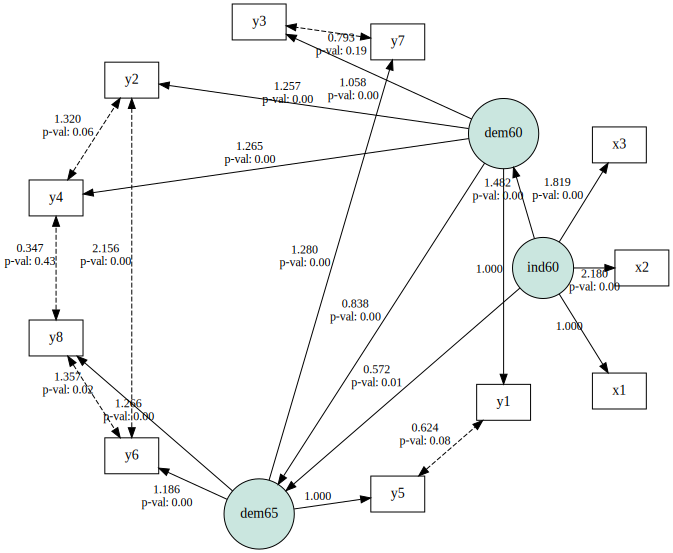

In [ ]:
semopy.semplot(model, "graph.png", plot_covs=True, engine="circo")
#点線：共分散を表示

## 共変量調整・傾向スコア

*  共変量の偏りを調整してRCTの結果に近づける（特に、交絡因子Cの調整）
*  調整のための指標としてバランシングスコアを使用（例：傾向スコアπ）
*  π(C)=P(T=1∣C)<br>
仮定<br>
条件付き独立性（無交絡性）:(Y(0),Y(1))⊥T∣C<br>
重なり:0<P(T=1∣C)<1
*  正値性を満たすことを確認できる（図示によって）


In [ ]:
!pip install causallib==0.9.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.0/32.0 MB 10.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: scikit-learn
    Found existing installation:

In [ ]:
from causallib.datasets import load_nhefs
from causallib.estimation import IPW, PropensityMatching,StratifiedStandardization
from causallib.evaluation import evaluate
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [ ]:
data = load_nhefs()

In [ ]:
display(data)

{'X':       age  race  sex  smokeintensity  smokeyrs   wt71  active_1  active_2  \
 0      42     1    0              30        29  79.04         0         0   
 1      36     0    0              20        24  58.63         0         0   
 2      56     1    1              20        26  56.81         0         0   
 3      68     1    0               3        53  59.42         1         0   
 4      40     0    0              20        19  87.09         1         0   
 ...   ...   ...  ...             ...       ...    ...       ...       ...   
 1623   47     0    1              20        31  84.94         0         0   
 1624   45     0    0              40        29  63.05         0         0   
 1625   47     0    1              20        31  57.72         0         0   
 1627   68     0    0              15        46  52.39         1         0   
 1628   29     0    0              30        14  90.83         1         0   
 
       education_2  education_3  education_4  education_5

Step2.DAG<br>
結果：体重、処置：喫煙の有無、共変量：その他<br>
Step3.識別仮定<br>
*  SUTVAの確認
*  共変量の選択
*  その他（過剰調整/多重共線性の回避）

Step4.因果効果の推定<br>
①傾向スコアの推定:回帰モデルや機械学習モデルを用いて算出<br>
②傾向スコアの活用:
*  **マッチング**：処置群と対象郡の共変量が近いものを組み合わせること
*  **重みづけ**：観測データの各個体に重みづけを行い、処置と対象郡の分布が似ている疑似母集団を形成すること
*  層別解析：共変量の値を層で分け、各々共変量について均等になるように調整し、比較
*  メタラーナー:傾向スコアとアウトカムを使って処置効果を推定する学習戦略。例として、T-Learner、S-Learner、X-Learner などがあり、機械学習モデルと組み合わせて因果推論を行う。
*  ツリーモデル:Causal Tree や Causal Forest などのツリーベースの手法を用いて、個別の処置効果（heterogeneous treatment effect）を推定する。傾向スコアで事前調整を行うこともある。
*  表現学習:深層学習を用いて、処置群と対象群の共変量の分布を揃えるような潜在空間（representation）を学習する。例：TARNet, DragonNet など。
*  マルチタスク学習法:処置の有無ごとのアウトカム予測を同時に学習することで、両者の情報を共有しながら因果効果を推定する。因果推論において推定の精度を高める技術の一つ。

In [ ]:
#傾向スコアを算出するモデルの定義
learner = LogisticRegression(
solver="liblinear", # liblinear: 線形モデル向けの最適化アルゴリズム
class_weight="balanced") # 正例と負例のバランスを取るために使用（第4章で説明）

#傾向スコアの算出とマッチング
pm = PropensityMatching(learner=learner)
pm.fit(data.X, data.a, data.y)

PropensityMatching(caliper=None, covariance_conditioner=EmpiricalCovariance(), estimate_observed_outcome=False, knn_backend=sklearn, matching_mode=both, metric=mahalanobis, n_neighbors=1, propensity_transform=PropensityTransformer(learner=LogisticRegression(class_weight='balanced',
                                                 solver='liblinear')), with_replacement=True,
                   learner=LogisticRegression(class_weight='balanced', solver='liblinear'))

In [ ]:
# ATEの計算
outcomes = pm.estimate_population_outcome(data.X, data.a) # 処置群と対照群それぞれの結果変数の平均値を推定
effect = pm.estimate_effect(outcomes[1],outcomes[0])# ATEを推定

#結果の出力
print(f"Average outcome of Untreated: {outcomes[0]:.3f}")
print(f"Average outcome of Treated: {outcomes[1]:.3f}")
print(f'Average Treatment Effect: {effect["diff"]:.3f}')

Average outcome of Untreated: 1.726
Average outcome of Treated: 4.683
Average Treatment Effect: 2.956


IPW（逆確率重みづけ）:処置群に傾向スコアの逆数で重みづけ/対象郡に(1-傾向スコア)の逆数で重みづけ

In [ ]:
#傾向スコアを算出するモデルの定義
learner = LogisticRegression(
solver="liblinear",
class_weight="balanced")

#傾向スコアを算出し、IPWを実施
ipw = IPW(learner = learner)
ipw.fit(data.X, data.a)

# ATEの計算
outcomes = ipw.estimate_population_outcome(data.X, data.a, data.y)
effect = ipw.estimate_effect(outcomes[1], outcomes[0])

#結果の出力
#喫煙を続けたときの平均的な体重増加の推定値
print(f"Average outcome of Untreated: {outcomes[0]:.3f}")
#喫煙をやめたときの平均的な体重増加の推定値
print(f"Average outcome of treated: {outcomes[1]:.3f}")
#傾向スコアマッチングにより推定されたATE
print(f'Average Treatment Effect: {effect["diff"]:.3f}')

Average outcome of Untreated: 1.563
Average outcome of treated: 4.975
Average Treatment Effect: 3.412


結果の評価

*   絶対標準化平均差(ASMD):処置群と対象群の各共変量の平均値の差を、標準偏差で割ってスケーリングした指標。0.1未満（10%）が良好なバランスの目安
*   分散比:処置-対象郡の共変量の分散比、1に近いほど許容可能なバランス
*   図示:傾向スコアの分布の図示




<Axes: xlabel='Absolute Standard Mean Difference', ylabel='Covariates'>

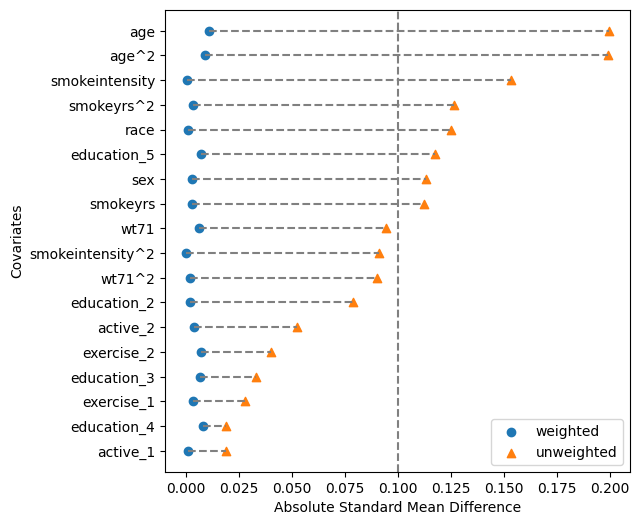

In [ ]:
results = evaluate(ipw, data.X, data.a, data.y)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
results.plot_covariate_balance(kind="love", ax=ax, thresh=0.1) #ASMDのカットオフ値(thresh)を0.1に設定

<Axes: title={'center': 'Propensity Distribution'}, xlabel='Propensity', ylabel='Probability density'>

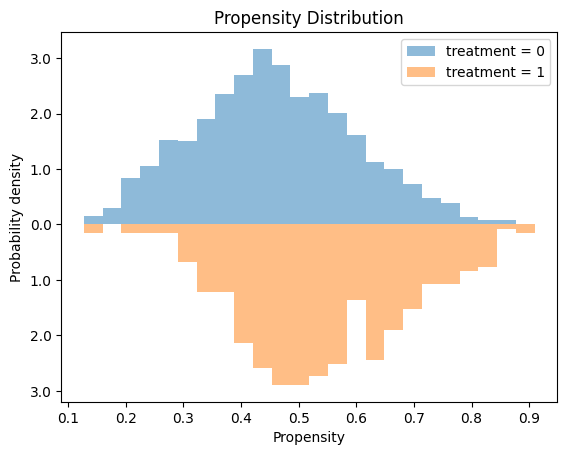

In [ ]:
results.plot_weight_distribution()

傾向スコア分析の課題
*   未観測の交絡因子への対応
*   IPWの極端な重みづけへの対応→クリッピング（予め設定した値をIPWが超えたとき設定値を採用。しかし、バイアスを生む恐れ）



## 二重にロバスト（頑健）な推定法(DR)

回帰分析と傾向スコアを用いてどちらかが間違っていてもいいように因果効果を推定

In [ ]:
!pip install --upgrade causallib

In [ ]:
!pip uninstall -y numpy
!pip install numpy==1.23.5

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.1.3 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.1.3 which is incompatible.
thinc 8.3.6 require

In [ ]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from causallib.datasets import load_nhefs
from causallib.estimation import IPW, Standardization,StratifiedStandardization
from causallib.estimation import AIPW,PropensityFeatureStandardization,WeightedStandardization
from causallib.evaluation import evaluate

In [ ]:
data = load_nhefs()

Step2.DAG<br>
結果：体重、処置：喫煙の有無、共変量：その他<br>
Step3.識別仮定<br>
*  IPW:逆確率重みづけ
*  StratifiedStandardization:層別化して各々のATE計算
*  AIPW:上二つを組み合わせてよりロバストな推定
*  その他（正値性、共変量バランス）

In [ ]:
#傾向スコアを算出し、IPWを実施
#clip:クリッピングの閾値
ipw = IPW(LogisticRegression(solver="liblinear"),clip_min=0.05,clip_max=0.95)
#層別化
std = StratifiedStandardization(LinearRegression())
#二重にロバスト:outcome_model(SEM)=std, treatment_model=ipw
dr = AIPW(std,ipw)

dr.fit(data.X, data.a,data.y)

AIPW(outcome_covariates=None, outcome_model=StratifiedStandardization(learner=LinearRegression()), overlap_weighting=False, predict_proba=False, weight_covariates=None,
     weight_model=IPW(clip_max=0.95, clip_min=0.05, use_stabilized=False, verbose=False,
    learner=LogisticRegression(solver='liblinear')))

In [ ]:
#処置-対象郡の結果変数の期待値
pop_outcomes = dr.estimate_population_outcome(data.X, data.a, data.y)
pop_outcomes
#ATE
effect = dr.estimate_effect(pop_outcomes[1], pop_outcomes[0])
effect

,0
diff,3.443486


DRの課題
*   傾向スコアモデルが正しくても、結果変数モデルが適切ではなければ大きなバイアスがおこる可能性
*   観測値に基づくため、選択バイアスと未観測の交絡因子の対応

## 回帰不連続デザイン(RDD)

*  自然実験の一種（RCTが行われたように事象を発生させる、未確認の交絡因子に対応）
*  合格点など強制的なカットオフ値がある状況で使用
*  回帰不連続デザインでは、観測変数𝑋を**強制変数（forcing variable）または割当変数（running variable）**と呼び、特定のカットオフ点𝑐を基準にして処置(T=0or1)の割り当てが決定


In [ ]:
!pip install rdrobust==1.2.0
!pip install rddensity==2.4.1

In [ ]:
!pip uninstall -y numpy
!pip install numpy==1.23.5

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 89.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
bigframes 2.1.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
pymc 5.22

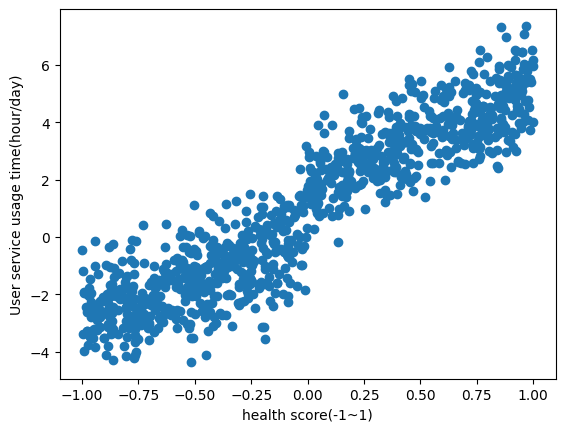

In [ ]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rdrobust
import rddensity

# 再現性のためにランダムシードを設定
np.random.seed(0)

# サンプルデータを生成
n = 1000 # 観測データの数
X = np.random.uniform(-1, 1, size=n) # 強制変数
threshold = 0 # 処置のカットオフ値
treatment = (X > threshold).astype(int) # 処置の割当
#tratment:プロモーションを受けたか(0or1)
Y = 3 * X + 2 * treatment + np.random.normal(size=n) # 結果変数

# データフレームの作成
df = pd.DataFrame({
    'Y': Y,
    'X': X,
    'treatment': treatment
})

# データの可視化
plt.scatter(df['X'], df['Y']) # 散布図の作成
plt.xlabel('health score(-1~1)') # X軸のラベル
plt.ylabel('User service usage time(hour/day)') # Y軸のラベル
plt.show() # グラフの表示

Step2.DAG<br>
結果：サービス利用時間、処置：プロモーションの有無、強制：健康スコア<br>
Step3.識別仮定<br>
①処置-対象郡の識別仮定の確認：潜在的結果との一致性、条件付き独立(処置はXによってのみ依存)、相互作用なし　は満たされるが正値性は不明（カットオフの前後で割り当てが決定的）→連続性の仮定により局所的なATEを推定<br>
②連続性仮定の確認<br>
1.   カットオフ値付近の個体の分布の確認（なめらかで、連続的か）
2.   カットオフ値付近の連続性の検定（共変量がカットオフ前後で大きく変化しない＝処置以外の要因が不連続に変化しない＝交絡の可能性がない）



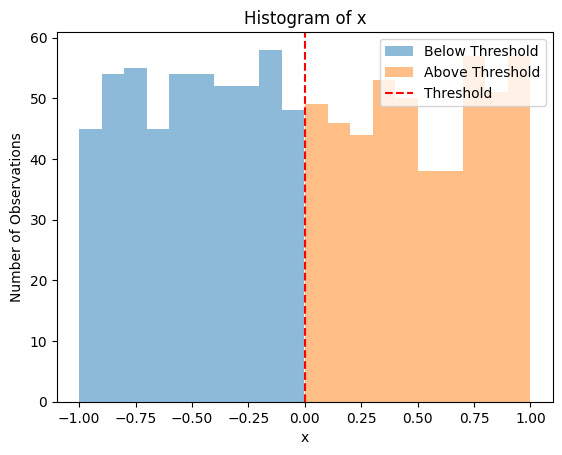

In [ ]:
#②1. カットオフ値付近の個体の分布の確認（なめらかで、連続的か）

plt.hist(df[df['X'] < threshold]['X'], bins=10, alpha=0.5, label='Below Threshold')
plt.hist(df[df['X'] >= threshold]['X'], bins=10, alpha=0.5, label='Above Threshold')
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('x')
plt.ylabel('Number of Observations')
plt.title('Histogram of x')
plt.legend()
plt.show()#この場合特に問題なし

In [ ]:
#②2.   カットオフ値付近の連続性の検定
#共変量がカットオフ前後で大きく変化しない＝処置以外の要因が不連続に変化しない
#＝交絡の可能性がない

rddensity.rddensity(X, c=0)

#p-値　0.3356は有意水準0.05以上であるため、帰無仮説は棄却されない
#確率密度関数が連続とみなされる

Manipulation testing using local polynomial density estimation
Number of obs:                              1000
Model:                              unrestricted
Kernel:                               triangular
BW method:                             estimated
VCE:                                   jackknife

c = 0                               Left of c             Right of c
Number of obs:                            517                    483
Eff. number of obs:                       184                    153
Order est. (p):                             2                      2
Order bias. (q):                            3                      3
BW est.                                0.3446                 0.3336

Method:                                     T                P > |T|
Robust                                  0.963                 0.3356

P-values of binomial tests (H0: p =  [0.5] ).

Window Length/2                           < c                     >= c                    

Step4.因果効果の推定<br>
①バンド幅の選択：カットオフ点の前後で「どこまでのデータを使って推定するか（＝局所性）」を決定する。<br>
*  バンド幅の設定：→ カットオフ値𝑐を中心として、左右に幅ℎを取り、区間 [c−h,c+h] に含まれるデータのみを使用する。→ この幅が広すぎるとバイアスが大きくなり、狭すぎると分散が大きくなるため、最適な幅を選ぶ必要がある。

*  回帰分析により推定値の算出：→ 区間内のデータを用いて、カットオフ点の左右で別々に回帰モデル（線形・多項式など）をフィッティングし、切片の差を推定する。

*  MSE（Mean Squared Error）の計算：→ 推定のバイアスと分散のトレードオフを考慮し、平均二乗誤差が最小となるバンド幅を選定。
→ 方法例：Imbens-Kalyanaraman法（IK法）、Calonico-Cattaneo-Titiunik法（CCT法）など。


②処置効果の推定：<br>


In [ ]:
rdrobust.rdrobust(Y,X,c=0)

#因果効果=Coef:1.194
#プロモーションを受けると1.2時間/日利用時間が増える

Call: rdrobust
Number of Observations:                  1000
Polynomial Order Est. (p):                  1
Polynomial Order Bias (q):                  2
Kernel:                            Triangular
Bandwidth Selection:                    mserd
Var-Cov Estimator:                         NN

                                Left      Right
------------------------------------------------
Number of Observations           517        483
Number of Unique Obs.            517        483
Number of Effective Obs.         112         97
Bandwidth Estimation            0.21       0.21
Bandwidth Bias                 0.362      0.362
rho (h/b)                       0.58       0.58

Method             Coef.     S.E.   t-stat    P>|t|       95% CI      
-------------------------------------------------------------------------
Conventional       1.194    0.304    3.922   8.767e-05     [0.597, 1.791]
Robust                 -        -    3.091   1.994e-03     [0.403, 1.799]


結果の評価

In [ ]:
#RDプロット
rdrobust.rdplot(Y,X, c=0)

<ggplot: (640 x 480)>
Call: rdplot
Number of Observations:                  1000
Kernel:                               Uniform
Polynomial Order Est. (p):                  4

                                Left      Right
------------------------------------------------
Number of Observations           517        483
Number of Effective Obs          517        483
Bandwith poly. fit (h)         0.999        1.0
Number of bins scale               1          1
Bins Selected                     36         49
Average Bin Length             0.028       0.02
Median Bin Length              0.028       0.02
IMSE-optimal bins               11.0       12.0
Mimicking Variance bins         36.0       49.0

Relative to IMSE-optimal:
Implied scale                  3.273      4.083
WIMSE variance weight          0.028      0.014
WIMSE bias weight              0.972      0.986


In [ ]:
#プラセボテスト
#仮のカットオフ値で因果効果を検定
#今回はCoef=0.349>p-値より因果効果はないと思われる
rdrobust.rdrobust(Y,X,c=0.5)

Call: rdrobust
Number of Observations:                  1000
Polynomial Order Est. (p):                  1
Polynomial Order Bias (q):                  2
Kernel:                            Triangular
Bandwidth Selection:                    mserd
Var-Cov Estimator:                         NN

                                Left      Right
------------------------------------------------
Number of Observations           759        241
Number of Unique Obs.            759        241
Number of Effective Obs.          85         60
Bandwidth Estimation           0.157      0.157
Bandwidth Bias                 0.251      0.251
rho (h/b)                      0.626      0.626

Method             Coef.     S.E.   t-stat    P>|t|       95% CI      
-------------------------------------------------------------------------
Conventional       0.349    0.392    0.889   3.741e-01     [-0.42, 1.118]
Robust                 -        -    0.883   3.773e-01    [-0.506, 1.337]


RDDの課題
*   カットオフ値の信憑性
*   データの（カットオフ値付近の）密度が疎のとき
*   カットオフ値から離れた点への外部妥当性

多次元カットオフ値、時間的RDD

## 操作変数法(IV)

操作変数Z：未観測の交絡因子で、結果に直接影響をあたえず、処置のみに影響を与える<br>

**仮定**

1.SUTVA（Stable Unit Treatment Value Assumption）：各個体の結果は、他の個体の処置の影響を受けず、処置は明確に定義された 1 つだけである。

2.関連性（Relevance）：操作変数𝑍は処置𝑇に有意な影響を与える（Cov(𝑍,𝑇)≠0)

3.排除制約（Exclusion Restriction）：操作変数𝑍は処置𝑇を通じてのみ結果𝑌に影響する（𝑍はYに直接影響しない）。

4.独立性（Independence / Unconfoundedness）：操作変数𝑍は未観測の交絡因子Cと独立である（Cov(𝑍,C)=0）

5.単調性（Monotonicity）：操作変数𝑍はすべての個体において処置への影響が同じ方向（反転する個体がいない）

Example.運動量が健康指標に与える影響はどの程度か？

In [ ]:
# 使用するライブラリのインポート
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS

# 再現性のためのシードを設定
np.random.seed(0)

# サンプルデータを生成
n = 1000  # 観測値の数
Z = np.random.normal(size=n)  # 操作変数（運動キャンペーン、地域人口）
u = np.random.normal(size=n)  # 誤差項
T = Z + np.random.normal(size=n)  # 処置変数（運動量の平均値）
Y = T + u  # 結果変数(健康指標の平均値)

# DataFrameを作成
df = pd.DataFrame({
    'Y': Y,
    'T': T,
    'Z': Z,
    'u': u
})

# 結果変数を定義
Y = df['Y']

# 処置変数を定義
T = sm.add_constant(df['T'])

# 操作変数を定義
Z = sm.add_constant(df['Z'])

In [ ]:
# 操作変数法を適用
iv = IV2SLS(Y, T, Z).fit()

In [ ]:
# 回帰のサマリーを出力
#２段階最小二乗法
print(iv.summary())

#T:coef=0.9679,p=0→地域の平均運動量が0.9679増えると平均健康指標が1上がる

                          IV2SLS Regression Results                           
Dep. Variable:                      Y   R-squared:                       0.652
Model:                         IV2SLS   Adj. R-squared:                  0.651
Method:                     Two Stage   F-statistic:                     902.4
                        Least Squares   Prob (F-statistic):          9.68e-142
Date:                Mon, 12 May 2025                                         
Time:                        06:57:31                                         
No. Observations:                1000                                         
Df Residuals:                     998                                         
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0105      0.031      0.342      0.7

IVの課題
*   操作変数の発見・検証が難しい
*   弱操作変数（処置変数と弱い相関をもつ操作変数）による不正確な推定

その他IVの使用方法
*   一般化した操作変数法（複数の処置に複数の操作）
*   LIML(処置と結果の両方に同時に最尤推定)
*   GMM（複数の操作変数があるとき）
*   ノンパラメトリックIV

## 差分の差分法(DiD)

処置-対象郡の処置前後での差を比較<br>
仮定
1.   並行トレンド仮定：処置が行われなかった時の二群間での時系列変化は同じ
2.   共通ショック仮定：測定期間中に目的変数に影響を与える様なほかのイベントが発生していない



In [ ]:
!pip install numpy==1.23.5
!pip install causalpy==0.0.14

  Using cached CausalPy-0.0.14-py3-none-any.whl.metadata (25 kB)
  Using cached jedi-0.19.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached CausalPy-0.0.14-py3-none-any.whl (88 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.


In [ ]:
from sklearn.linear_model import LinearRegression
import causalpy as cp

Example.新しいマーケティングの売り上げ効果はどれくらいか

In [ ]:
data = cp.load_data("did")
data.head()
#各店舗(unit)が処置群に属しているかどうか（group）,販売額(y)
#post_treatment=処置前(False)か後(True)か

,group,t,unit,post_treatment,y
0,0,0.0,0,False,0.897122
1,0,1.0,0,True,1.961214
2,1,0.0,1,False,1.233525
3,1,1.0,1,True,2.752794
4,0,0.0,2,False,1.149207


Step2.DAG<br>
結果：販売額、処置：マーケティング施策<br>
Step3.識別仮定<br>
①並行トレンド仮定<br>
②共通ショック仮定<br>

/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


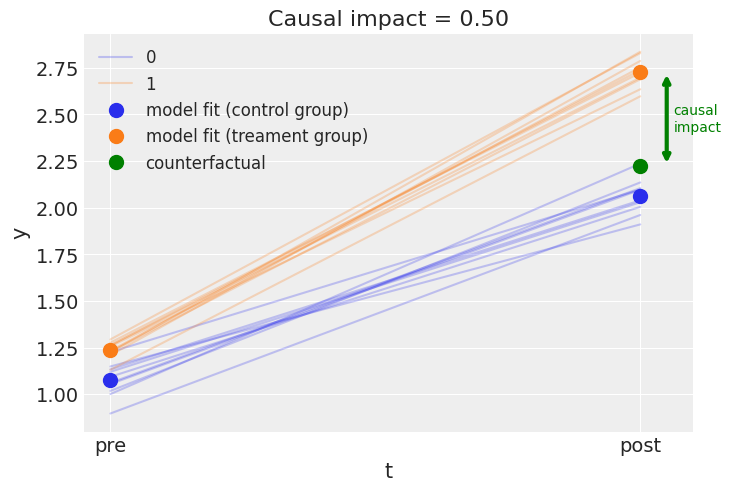

In [ ]:
result = cp.skl_experiments.DifferenceInDifferences(
    data,
    formula="y ~ 1 + group*post_treatment",# モデルの式（yは目的変数、1は定数項を意味する）
    #group*post_treatment=1のときのみ、処置群の処置後になる
    time_variable_name="t",# 時間変数の名前
    group_variable_name="group",# グループ変数（処置群か対照群かを示す変数）の名前
    treated=1,# 処置群を示す値
    untreated=0,# 対照群を示す値
    model=LinearRegression(),
)

fig, ax = result.plot();# 分析結果のプロット
#Causal impact=0.50：因果効果50万円

DiDの課題
*  仮定を満たすことが難しい
*   両郡で類似した個体を探し、マッチングすることが難しい（因果効果を適切に算出できない）→合成コントロール法で仮定を緩和

## 合成コントロール法(SC)

処置-対照群の一方が少数でも、他方の郡内の個体の組み合わせ（各個体の重みづけ）により適切な比較（DiD）ができる<br>

例：政策施行まえのデータを回帰に使った予測（合成対照群）と観測データの比較で因果効果を推定

In [ ]:
!pip install causalpy==0.0.14

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.1 MB/s eta 0:00:00


Example.緊急事態宣言が商業施設の売り上げに与える影響

In [ ]:
#ライブラリのインポート
from sklearn.linear_model import LinearRegression
import causalpy as cp

#データのロード
df = cp.load_data("sc")

#処置のタイミングの設定(70日時点)
treatment_time = 70

Step2.DAG<br>
結果：商業施設の売り上げ、処置：緊急事態宣言<br>
Step3.識別仮定<br>
①条件付き独立性：合成対照群の作成上未観測の交絡因子は存在せず、共変量の分布は施策前後で変化しない<br>
②正値性：<br>
③SUTVA：特に「相互作用なし」が重要（宣言を受けた店舗はそれぞれ遠方にあり、それぞれの店舗で影響を与え合わない）<br>

+④一般的な回帰分析を用いて処置群と合成対照群が近似できているか確認

In [ ]:
# 合成コントロール法による因果効果の推定
result = cp.skl_experiments.SyntheticControl(
    df,
    treatment_time,
    formula="actual ~ 0 + a + b + c + d + e + f + g", # actualが処置群の個体の売上を表し、変数a～gが対照群の個体を表す。説明変数の最初の0は切片が0であることを表す
    model=cp.skl_models.WeightedProportion(),# 重み付けを実施し、個体a～gを用いて合成対照群を作成
)

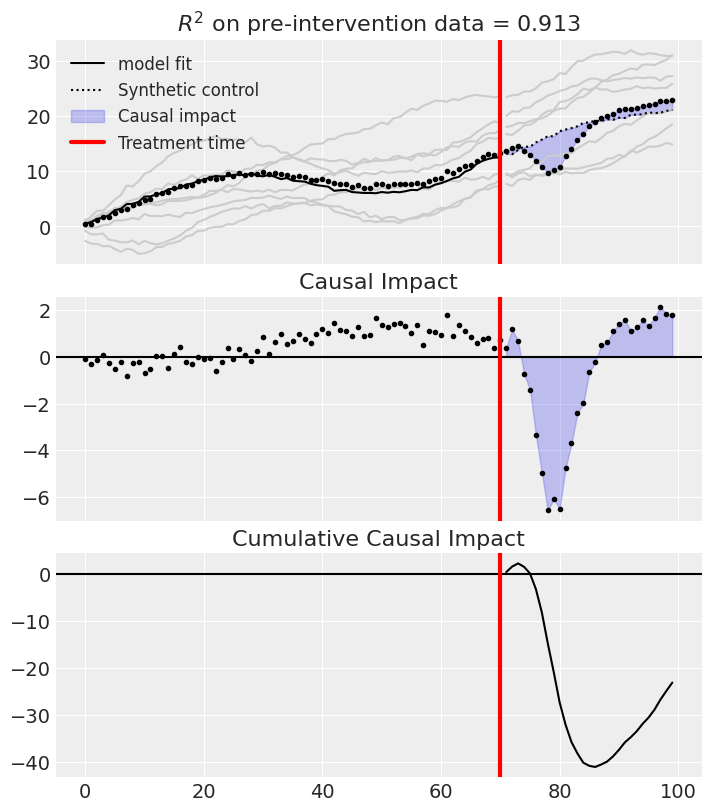

In [ ]:
# 結果の可視化
fig, ax = result.plot(plot_predictors=True)

#上段：処置群の売り上げ（黒〇）と合成対照群の売り上げ（破線）
#中段：因果効果＝両群の差分（薄い青の面積）
#下段：累積の因果効果（最大で-40万円）

/usr/local/lib/python3.11/dist-packages/causalpy/skl_experiments.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.11/dist-packages/causalpy/skl_experiments.py:146: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


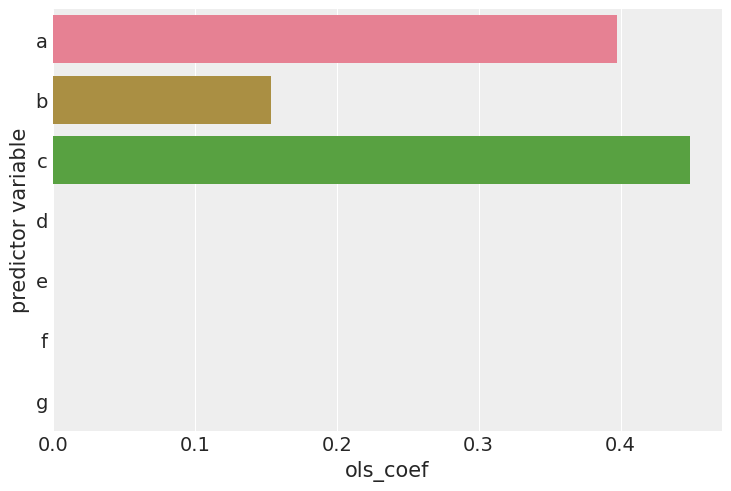

In [ ]:
#合成対照群を作るときの重み
result.plot_coeffs()

SCの課題
*  共変量の分布が施策前後で大きく変化するとき
*   時系列の長さが短いとき

## Synsetic DiD

$ pip install git+https://github.com/MasaAsami/pysynthdid

In [6]:
# pysynthdid をクローン
!git clone https://github.com/MasaAsami/pysynthdid.git
%cd pysynthdid

# setup.py の sklearn → scikit-learn への置換
!sed -i 's/sklearn/scikit-learn/' setup.py


Cloning into 'pysynthdid'...
remote: Enumerating objects: 326, done.
remote: Total 326 (delta 0), reused 0 (delta 0), pack-reused 326 (from 1)
Receiving objects: 100% (326/326), 6.96 MiB | 29.10 MiB/s, done.
Resolving deltas: 100% (182/182), done.
/content/pysynthdid


In [7]:
!pip install .

Processing /content/pysynthdid
  Preparing metadata (setup.py) ... done
  Created wheel for pysynthdid: filename=pysynthdid-0.0.1-py3-none-any.whl size=16385 sha256=e047a9fdd44eb83972ffce33b3eb11a785ef58955bf4f2f9c0235823744ffc58
  Stored in directory: /tmp/pip-ephem-wheel-cache-phhojs2i/wheels/8f/a5/94/01ad8e3252ee29e8300771d759af95abd3d2f07e69a3b78f17
Successfully built pysynthdid


In [27]:
!pip install git+https://github.com/MasaAsami/pysynthdid.git

  Cloning https://github.com/MasaAsami/pysynthdid.git to /tmp/pip-req-build-5jx5u9b8
  Running command git clone --filter=blob:none --quiet https://github.com/MasaAsami/pysynthdid.git /tmp/pip-req-build-5jx5u9b8
  Resolved https://github.com/MasaAsami/pysynthdid.git to commit 01afe33ae22f513c65f9cfdec56a4b21ca547c28
  Preparing metadata (setup.py) ... done
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [31]:
!wget https://raw.githubusercontent.com/MasaAsami/pysynthdid/main/sample_data/MLAB_data.txt -P sample_data/

--2025-06-17 03:30:18--  https://raw.githubusercontent.com/MasaAsami/pysynthdid/main/sample_data/MLAB_data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15833 (15K) [text/plain]
Saving to: ‘sample_data/MLAB_data.txt.1’

MLAB_data.txt.1     100%[===================>]  15.46K  --.-KB/s    in 0.001s  

2025-06-17 03:30:18 (25.5 MB/s) - ‘sample_data/MLAB_data.txt.1’ saved [15833/15833]



In [36]:
import pandas as pd

url = "https://raw.githubusercontent.com/WillFeldman/SyntheticDifferenceInDifferences/master/data/california_smoking.csv"
df = pd.read_csv(url)

print(df.head())


HTTPError: HTTP Error 404: Not Found

In [34]:
import pandas as pd

# ファイルのパス
file_path = "sample_data/MLAB_data.txt"

# データ読み込み（headerなし）
df_raw = pd.read_csv(file_path, sep="\t", header=None)

# 1行目をカラム名に設定
df_raw.columns = df_raw.iloc[0]
df = df_raw[1:].reset_index(drop=True)

# 列名整形
#df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# データ型を適宜変換
df = df.apply(pd.to_numeric, errors='ignore')

print(df.head())



0        1.0         2.0        4.0         5.0         6.0         7.0   \
0    9.678974    9.643623   9.984357   10.188035    9.974561    9.817172   
1   89.344445   89.877777  82.622222  103.477776   90.055555   84.366667   
2    0.174802    0.164611   0.173703    0.163660    0.178224    0.176944   
3   18.960000   18.520000  25.080000   20.700000   26.080000   21.760000   
4  112.099998  121.500000  94.599998  104.800003  137.100006  124.099998   

0       8.0         9.0         10.0        11.0  ...       31.0        32.0  \
0   9.711301   10.006883    9.831646    9.836927  ...   9.702803    9.737284   
1  86.077778   89.833332   81.088888   90.655556  ...  88.544445   85.177778   
2   0.152017    0.170281    0.175090    0.169909  ...   0.173590    0.171026   
3  22.220000   24.740000   21.980000   23.240000  ...  21.260000   20.580000   
4  84.500000  107.599998  134.000000  100.199997  ...  91.900002  125.300003   

0       33.0       34.0        35.0        36.0        37.0   

<ipython-input-34-2226696439>:17: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')
